# Exemplar: Discover what is in your dataset

## Introduction

In this activity, you will discover characteristics of a dataset and use visualizations to analyze the data in **exploratory data analysis (EDA)**.

Unicorn Companies Data Set ="https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies"

## Step 1: Imports

In [2]:
# Import libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import opendatasets as od

### Load the dataset into a DataFrame

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies. The data will be loaded from the Kaggle link. 



In [3]:
# Load data from the csv file into a DataFrame
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration


In [4]:
# Display the first 10 rows of the data
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


- The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.
- The "Select Investors" column represents the top investors in the company.

In [5]:
# Size of the dataset
companies.size

10740

- The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset.

In [6]:
# Shape of the dataset
companies.shape

(1074, 10)

- According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company. 

### Get basic information about the dataset

To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column. There is more than one way to approach this task.

In [7]:
# Get information
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


- `Dtype` is listed as `int64` in the `Year Founded` column. This means that the year a company was founded is represented as an integer. 
- `Dtype` is listed as `object` for the `Date Joined` column. This means that the date a company became a unicorn is represented as an object. 
- There are some missing data in `City` and `Select Investors` columns but since they are not that realted, we will keep them at the time being.

In [8]:
#checking  for duplicated rows
companies.duplicated().sum()

0

In [9]:
#fill null values
values = {"City": "Not Listed", "Select Investors": "Not Listed"}
companies = companies.fillna(value=values)
companies.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [10]:
companies = companies[companies["Funding"] != 'Unknown']

In [11]:
companies["Industry"].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [12]:
# In the industry type: there are two inputs are the same with different letter cases "Artificial intelligence" and "Artificial Intelligence"
#incorrect data replacement
companies.replace({'Industry': r'Artificial intelligence'}, {'Industry':'Artificial Intelligence'},regex=True, inplace=True)

In [13]:
# Create a column representing company valuation as numeric data

# Create new column
companies['Valuation Billions'] = companies['Valuation']
companies['Valuation Billions'] = companies['Valuation Billions'].str.replace('$', '').str.replace('B', '').astype('int')

C:\Users\AMEEN\AppData\Local\Temp\ipykernel_29552\4188089685.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies['Valuation Billions'] = companies['Valuation Billions'].str.replace('$', '').str.replace('B', '').astype('int')


In [14]:
# Create a column representing company Funding as numeric data

# Create new column
companies['Funding Value'] = companies['Funding']
companies['Funding Value'] = companies['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype('int')
companies.info()

C:\Users\AMEEN\AppData\Local\Temp\ipykernel_29552\246695757.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies['Funding Value'] = companies['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype('int')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             1062 non-null   object
 1   Valuation           1062 non-null   object
 2   Date Joined         1062 non-null   object
 3   Industry            1062 non-null   object
 4   City                1062 non-null   object
 5   Country             1062 non-null   object
 6   Continent           1062 non-null   object
 7   Year Founded        1062 non-null   int64 
 8   Funding             1062 non-null   object
 9   Select Investors    1062 non-null   object
 10  Valuation Billions  1062 non-null   int32 
 11  Funding Value       1062 non-null   int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 99.6+ KB


## Step 3: Statistical tests

Finding descriptive statistics and structure your dataset.

In [15]:
### Descriptive statistics

companies.describe().round(2)

,Year Founded,Valuation Billions,Funding Value
count,1062.00,1062.00,1062.00
mean,2012.92,3.48,338.09
std,5.68,8.59,237.33
min,1919.00,1.00,0.00
25%,2011.00,1.00,166.00
50%,2014.00,2.00,300.00
75%,2016.00,3.00,491.50
max,2021.00,180.00,999.00


- The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.
- The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

### Convert the `Date Joined` column to datetime
 Having "date joined" in datetime form would help to complete tasks related to dates and times.

In [16]:
# onvert Date Joined column to datetime 
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [17]:
# Confirm that the update actually took place
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company             1062 non-null   object        
 1   Valuation           1062 non-null   object        
 2   Date Joined         1062 non-null   datetime64[ns]
 3   Industry            1062 non-null   object        
 4   City                1062 non-null   object        
 5   Country             1062 non-null   object        
 6   Continent           1062 non-null   object        
 7   Year Founded        1062 non-null   int64         
 8   Funding             1062 non-null   object        
 9   Select Investors    1062 non-null   object        
 10  Valuation Billions  1062 non-null   int32         
 11  Funding Value       1062 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 99.6+ KB


### Create a `Year Joined` column

Extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [18]:
# Extract year component from Date Joined column
companies["Year Joined"] = companies["Date Joined"].dt.year
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company             1062 non-null   object        
 1   Valuation           1062 non-null   object        
 2   Date Joined         1062 non-null   datetime64[ns]
 3   Industry            1062 non-null   object        
 4   City                1062 non-null   object        
 5   Country             1062 non-null   object        
 6   Continent           1062 non-null   object        
 7   Year Founded        1062 non-null   int64         
 8   Funding             1062 non-null   object        
 9   Select Investors    1062 non-null   object        
 10  Valuation Billions  1062 non-null   int32         
 11  Funding Value       1062 non-null   int32         
 12  Year Joined         1062 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object

## Step 4: Results and evaluation

### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling.


Text(0.5, 1.0, 'Top 50 Unicorns (according to Valuation)')

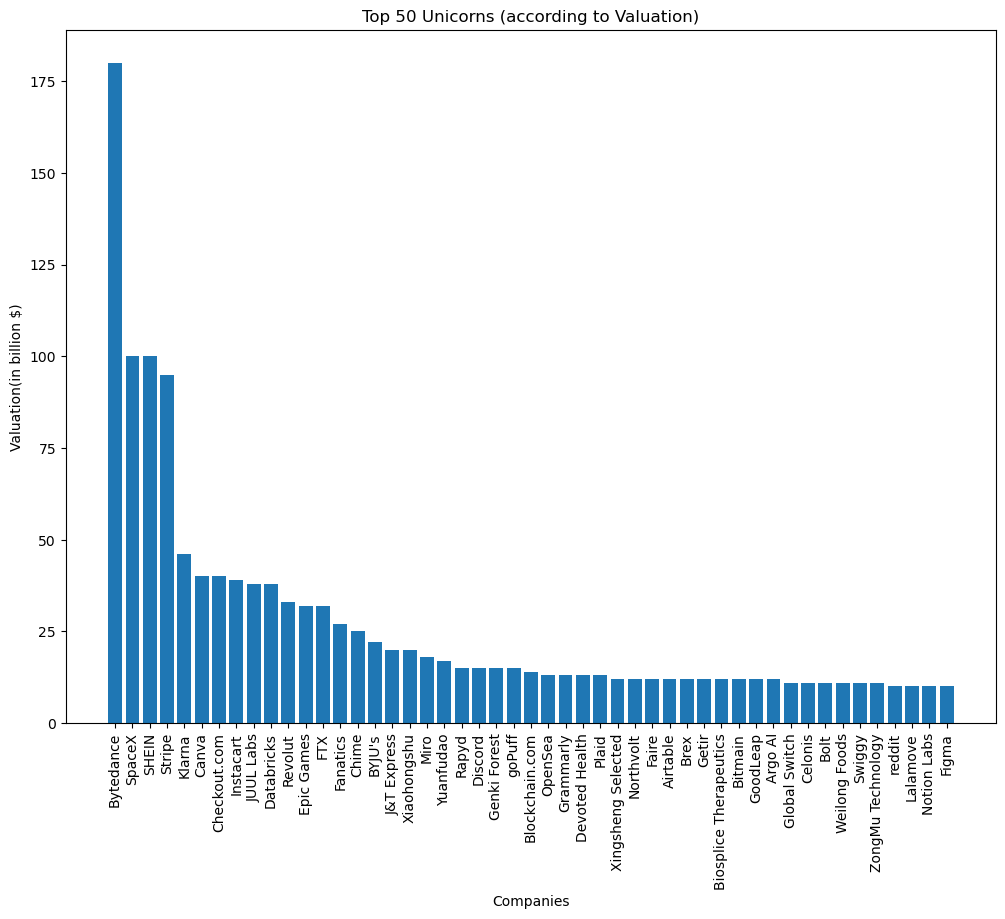

In [19]:
#top 50 companies with highest valuation
dataset = companies.sort_values('Valuation Billions', ascending=False)
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.bar(x = 'Company', height= 'Valuation Billions', data = dataset[:50])
plt.xlabel("Companies")
plt.ylabel("Valuation(in billion $)")
plt.title('Top 50 Unicorns (according to Valuation)')

**What are the top 5 companies according to Valuation?** 
- Bytdance, Space X, Shein,Stripe, and Klarna.

Text(0.5, 1.0, 'Unicorns Per Country')

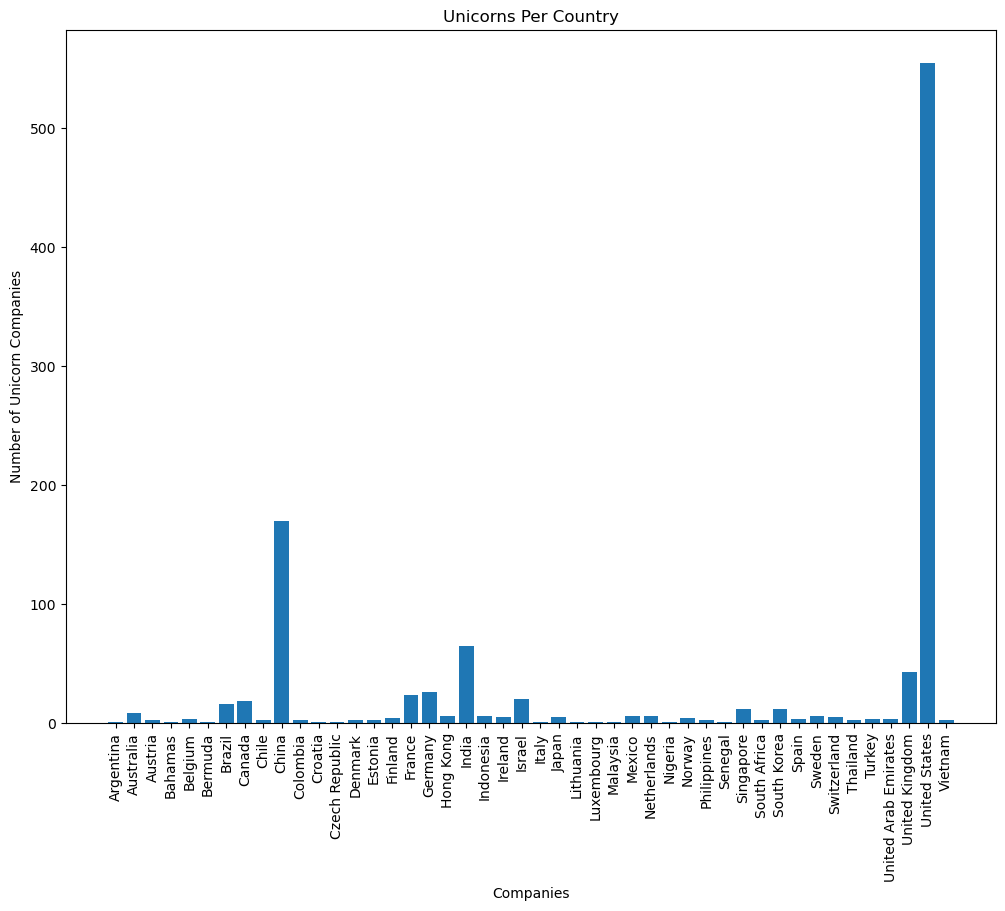

In [94]:
#unicorns per country
df = companies.groupby('Country')['Company'].count().reset_index()
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.bar(x = df['Country'], height= df['Company'])
plt.xlabel("Companies")
plt.ylabel("Number of Unicorn Companies")
plt.title('Unicorns Per Country')

**What are the top 5 countries which has the most unicorn companies?** 
- US, China,India,UK,and Germany

Text(0.5, 1.0, 'Unicorns Per Country')

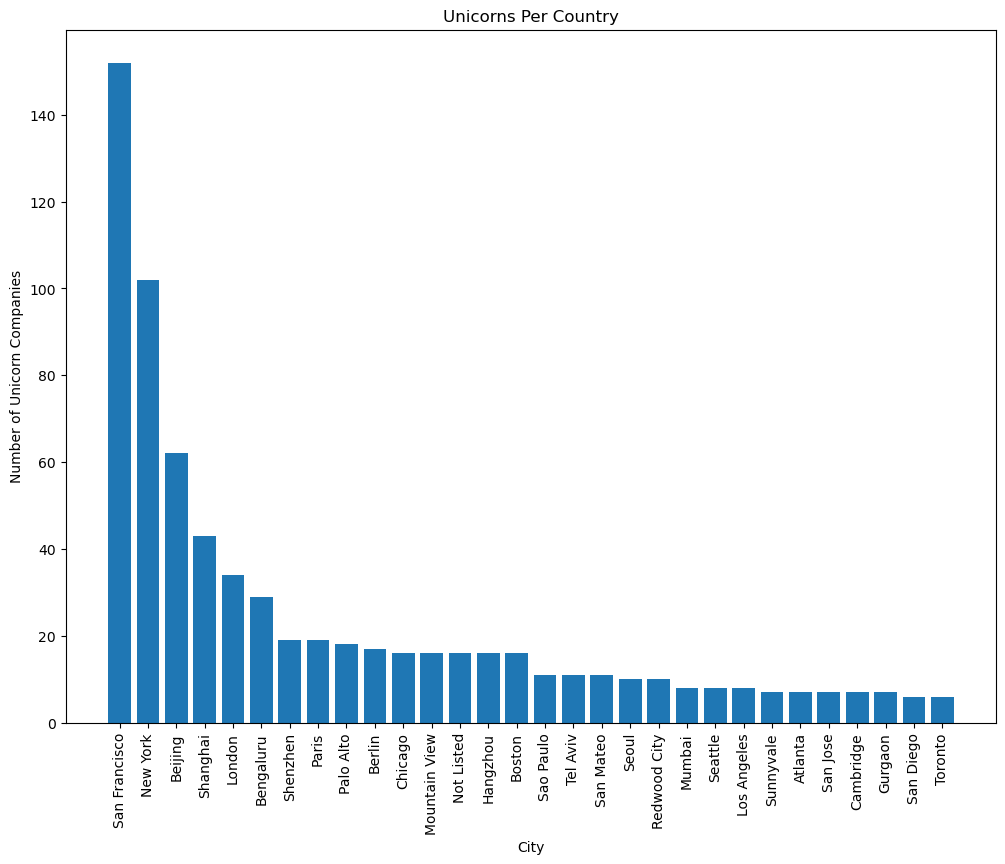

In [93]:
#unicorns per country
data = companies.groupby('City')['Company'].count().reset_index()
df = data.sort_values(by = "Company", ascending = False)[:30]
df
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.bar(x = df['City'], height = df['Company'])
plt.xlabel("City")
plt.ylabel("Number of Unicorn Companies")
plt.title('Unicorns Per Country')

**What are the top 5 countries which has the most unicorn companies?** 
- San Francisco, New York, Beijing, Shanghai, and London

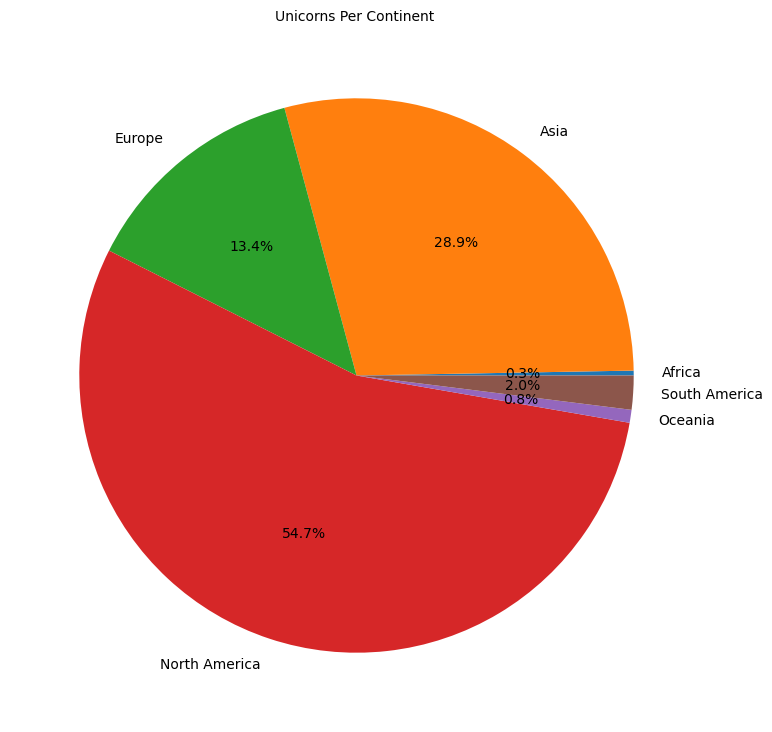

In [21]:
#unicorns per continent
df = dataset.groupby('Continent')['Company'].count().reset_index()
plt.figure(figsize=(12,9))
plt.pie(x=df['Company'], autopct=lambda p: '{:.1f}%'.format(p), labels=df["Continent"])
plt.title("Unicorns Per Continent ", fontsize=10);


**which continent has the most unicorn companies?** 
- North America, and Asia

**Which unicorn companies have had the biggest return on investment?**

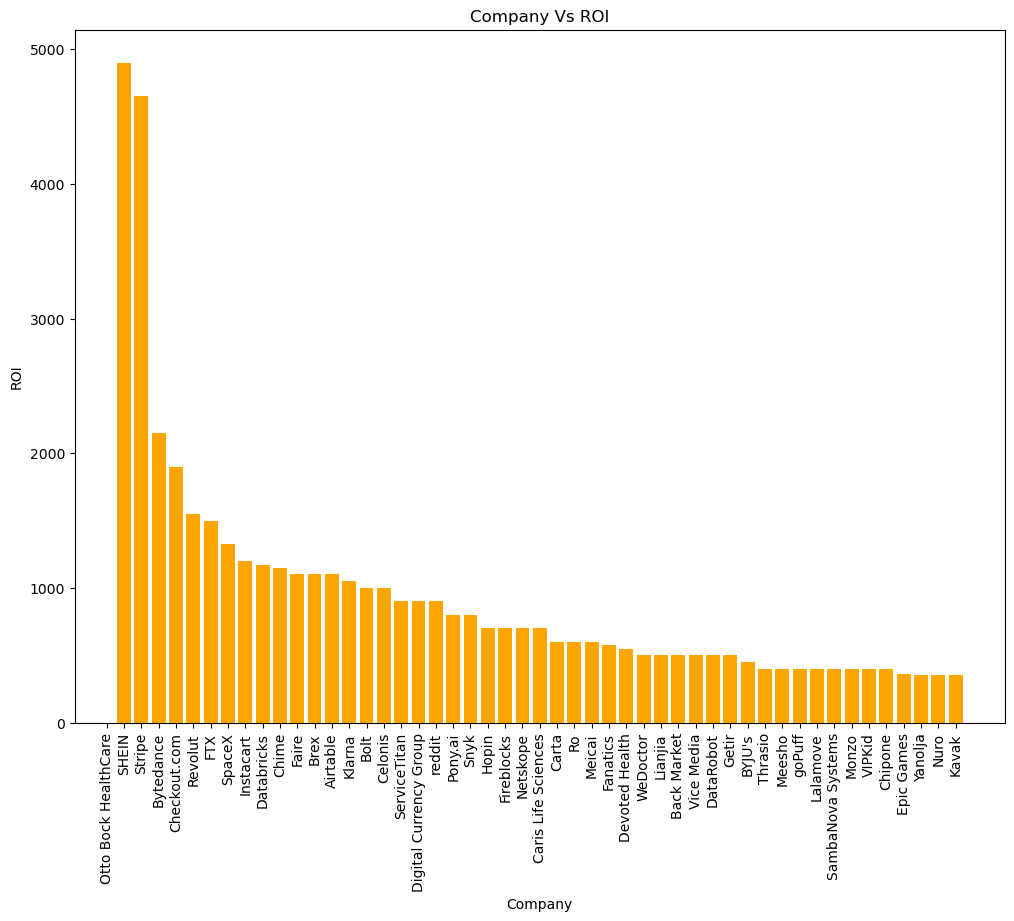

In [96]:
companies["ROI"] = (companies["Valuation Billions"] - companies["Funding Value"])/companies["Funding Value"]*100
Grouped = companies.groupby("Company").max().sort_values(by = "ROI", ascending = False).round(2)[:50]
Grouped
plt.figure(figsize=(12,9))
plt.bar(Grouped.index, Grouped["ROI"], color = "orange")
plt.xlabel("Company")
plt.ylabel("ROI")
plt.title('Company Vs ROI')
plt.xticks(rotation = 90)
plt.show()

In [23]:
# Sample the data
companies_sample = companies.sample(n = 50, random_state = 42)

### Visualize the time it took companies to reach unicorn status


In [24]:
# Prepare data for plotting
companies_sample["Years Till Unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "Years Till Unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Years Till Unicorn")
          )
grouped

,Years Till Unicorn
Industry,
Mobile & telecommunications,4
Other,4
Auto & transportation,7
Health,7
Consumer & retail,8
Hardware,8
"Supply chain, logistics, & delivery",8
Internet software & services,9
Artificial Intelligence,10


Now, create a bar plot.

- This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

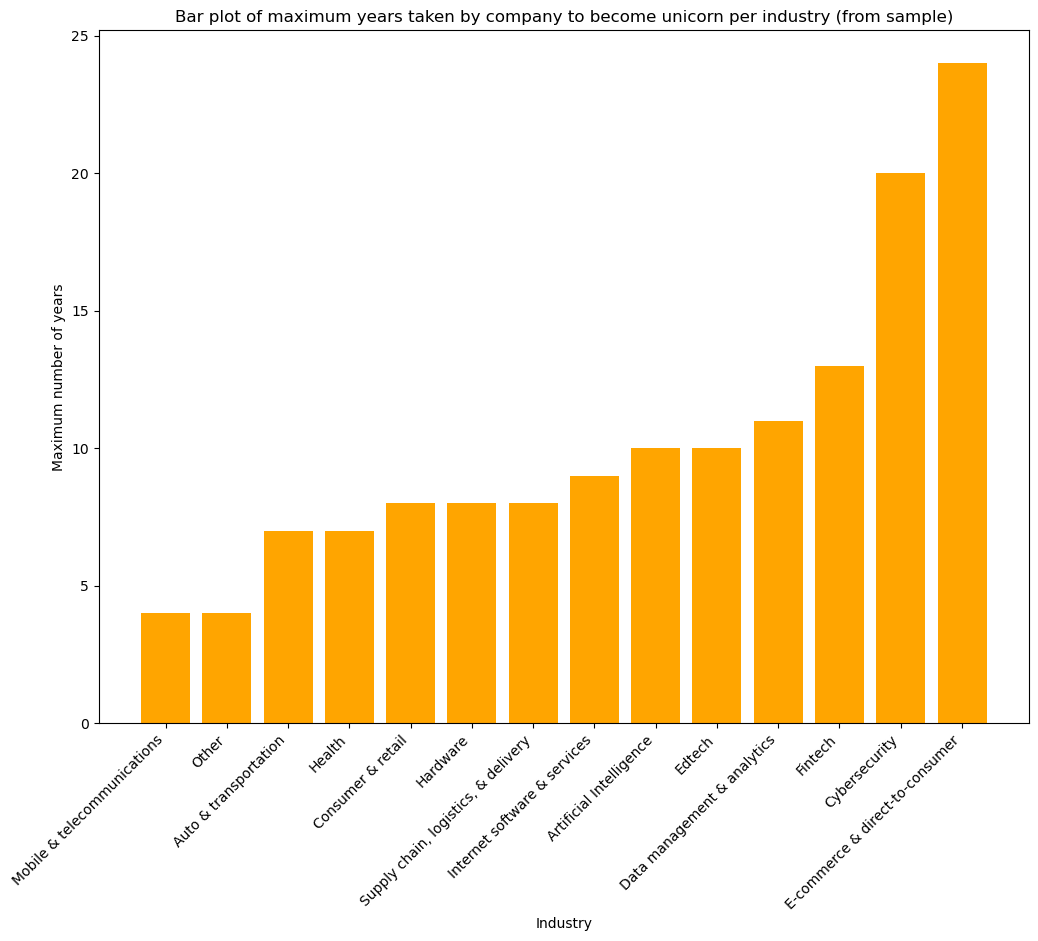

In [25]:
# Create bar plot
plt.figure(figsize=(12,9))
plt.bar(grouped.index, grouped["Years Till Unicorn"], color = "orange")
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

### Visualize the maximum unicorn company valuation per industry

Now, prepare the data for modeling by performing the necessary calculations on it.

In [40]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "Valuation Billions","City"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Valuation Billions")
          )
grouped

,Valuation Billions,City
Industry,,
Data management & analytics,1,San Jose
Hardware,1,Shanghai
Mobile & telecommunications,1,Beijing
Auto & transportation,2,Shanghai
Cybersecurity,2,San Francisco
Other,2,Norfolk
Edtech,3,Suzhou
Health,3,San Francisco
Internet software & services,3,Sunnyvale


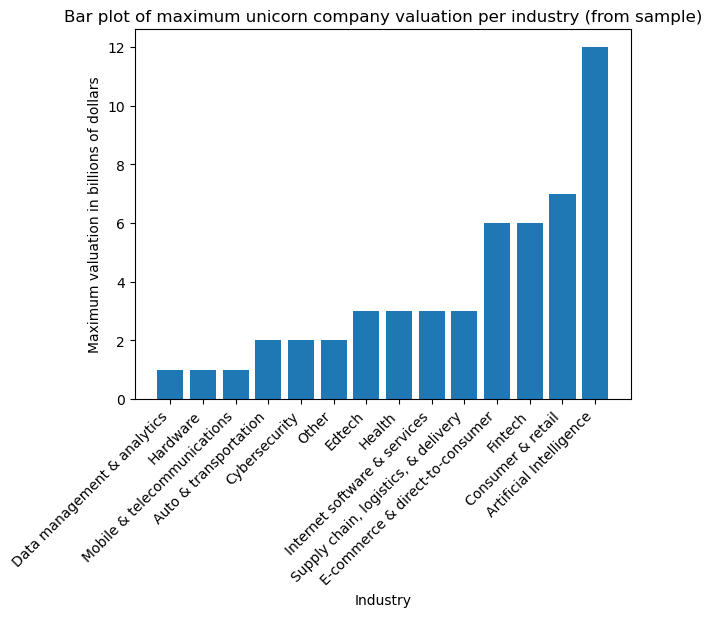

In [41]:
# Create bar plot
plt.bar(grouped.index, grouped["Valuation Billions"])
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

- This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.

## Considerations
**What findings would you share with others?**

- There are 1074 unicorn companies represented in this dataset.
- Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model. 

**What recommendations would you share with stakeholders based on these findings?**

Which unicorn companies have had the biggest return on investment?
How long does it usually take for a company to become a unicorn? 
Has it always been this way?Which countries have the most unicorns?
Are there any cities that appear to be industry hubs? Which investors have funded the most unicorns?